In [1]:
import numpy as np
import pandas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
X.shape, y.shape

((150, 4), (150,))

In [2]:
pandas.DataFrame(data=X, columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
names, y

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [4]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
pandas.DataFrame(data=Y, columns=names)

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


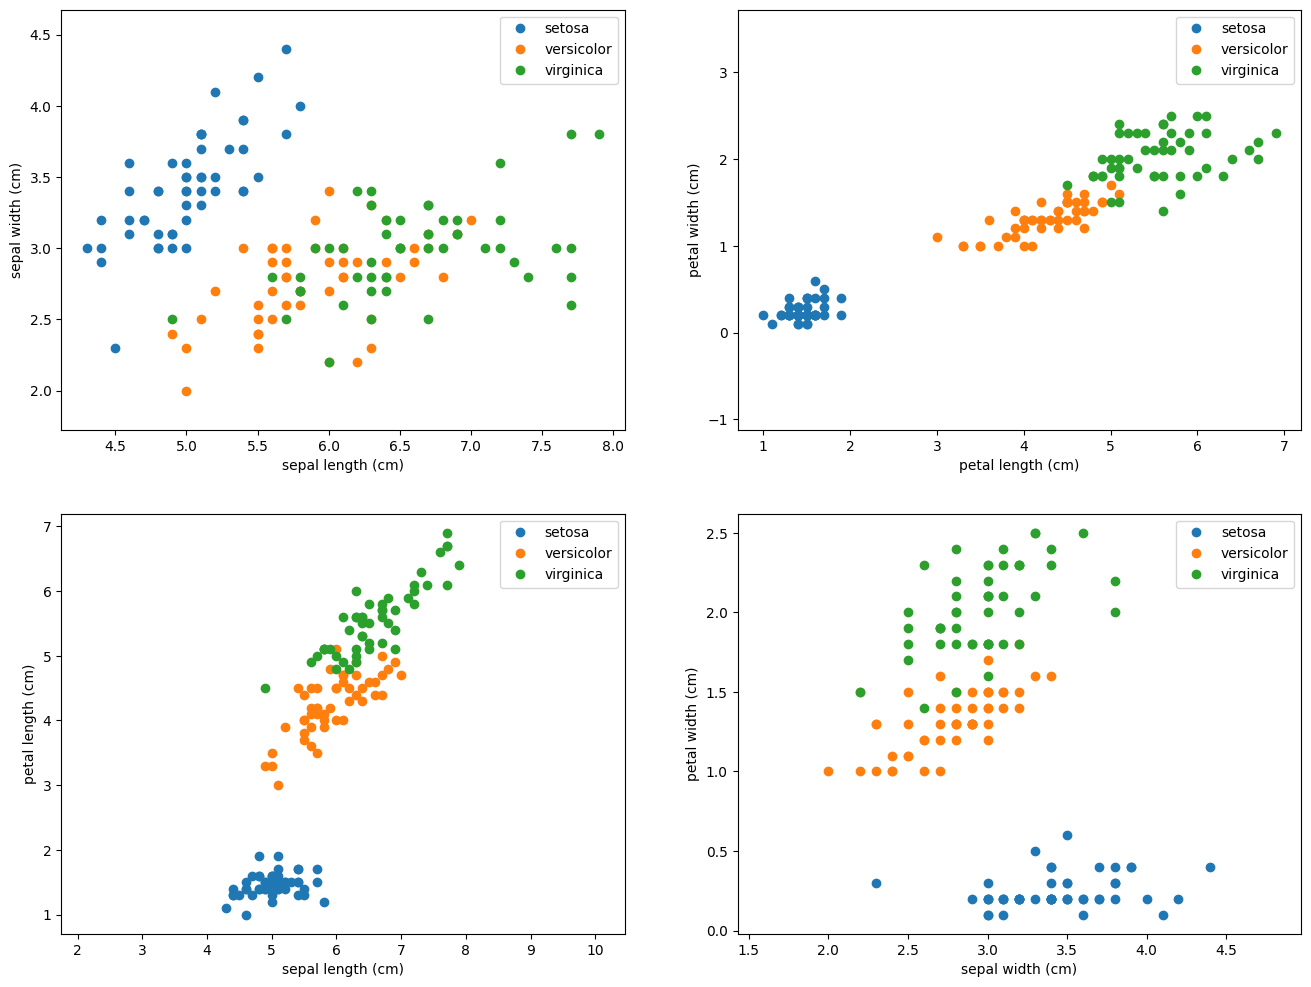

In [6]:
# Visualize the data sets
import matplotlib
import matplotlib.pyplot as plt

def plot_features(xs, ys, a, b):
    for target, target_name in enumerate(names):
        X_plot = xs[ys[:,target] == 1]
        plt.plot(X_plot[:, a], X_plot[:, b], linestyle='none', marker='o', label=target_name)    
    plt.xlabel(feature_names[a])
    plt.ylabel(feature_names[b])
    plt.axis('equal')
    plt.legend()

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plot_features(X, Y, 0, 1)
plt.subplot(2, 2, 2)
plot_features(X, Y, 2, 3)
plt.subplot(2, 2, 3)
plot_features(X, Y, 0, 2)
plt.subplot(2, 2, 4)
plot_features(X, Y, 1, 3)

Size of the train data: 45
Decision tree:


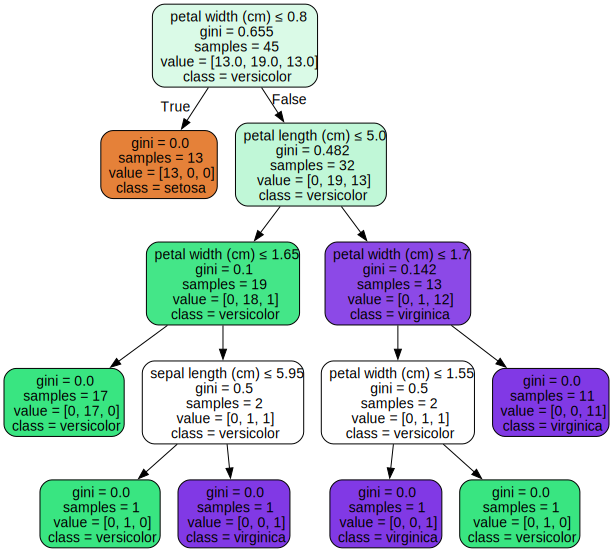

In [32]:
from sklearn import tree
import graphviz

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=2)
print(f'Size of the train data: {X_train.shape[0]}')

print('Decision tree:')
iristree = tree.DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=0)
iristree.fit(X_train, enc.inverse_transform(Y_train))
graphviz.Source(tree.export_graphviz(
    iristree,
    out_file=None, 
    feature_names=feature_names,  
    class_names=names,
    filled=True,
    rounded=True,  
    special_characters=True)
)

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def precision_recall(xs, ys):
    pred = iristree.predict(xs).reshape(-1,1)
    return pandas.DataFrame(
        data=[
            [
                precision_score(enc.inverse_transform(ys), pred, average='micro', labels=[label]),
                recall_score(enc.inverse_transform(ys), pred, average='micro', labels=[label]),
            ]
            for label in (0, 1, 2)
        ],
        index=names,
        columns=['precision', 'recall'],
    )
precision_recall(X_train, Y_train)

,precision,recall
setosa,1.0,1.0
versicolor,1.0,1.0
virginica,1.0,1.0


In [34]:
precision_recall(X_test, Y_test)

,precision,recall
setosa,1.000000,1.000000
versicolor,0.857143,0.967742
virginica,0.969697,0.864865
